In [53]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
from matplotlib.path import Path
from statistics import mean  # 추가: mean 함수를 사용하기 위해 statistics 모듈을 임포트

font = {'family': 'Times New Roman'}
plt.rc('font', **font)

grid_color = 'gainsboro'

model = "densenet201"

def LayerNum(model):
    if model == "densenet201" :
        return 306
    elif model == "resnet152" :
        return 206
    elif model == "enetb0" :
        return 136
    elif model == "csmobilenet-v2" :
        return 81
    elif model == "squeezenet" :
        return 50
    elif model == "yolov7" :
        return 143
    elif model == "yolov7-tiny" :
        return 99
    elif model == "yolov4" :
        return 162
    elif model == "yolov4-tiny" :
        return 38
    elif model == "resnet10" :
        return 17
    elif model == "yolov2-tiny" :
        return 16
    else :
        print("Unknown model: ", model)
        return 0

In [54]:
max_cores = 8
# max_cores = 31
data_type = "1114"

In [55]:
import pandas as pd

# 파일 경로
#file_path = "../data/measure_orin1/measure/sequential-multiblas/"+model+"/sequential_01blas.csv"
file_path = f"../data/data-{data_type}/layer_time/"+model+"/gpu_raw_data.csv"
# 데이터를 읽어옵니다.
data = pd.read_csv(file_path)

# 평균값을 저장할 배열
differences = []

# 각 layer에 대한 평균 계산
for i in range(LayerNum(model)):
    column_name = f"layer[{i}]"
    mean_value = data[column_name].mean()
    differences.append(mean_value)

print(len(differences))

306


In [56]:
import pandas as pd

# 파일 경로
file_path = f"../data/data-{data_type}/layer_time/"+model+"/cpu_raw_data_01blas.csv"
#file_path = "../data/11-12_orin2/layer_time/"+model+"/gpu_layer_time.csv"
# 데이터를 읽어옵니다.
data = pd.read_csv(file_path)

# 평균값을 저장할 배열
layer_means = []
print(data.columns)
# 각 layer에 대한 평균 계산
for i in range(LayerNum(model)):
    column_name = f"layer[{i}]"
    mean_value = data[column_name].mean()
    layer_means.append(mean_value)

print(len(layer_means))
x_data = list(range(len(layer_means)))

acceleration_ratio = []
for i in range(LayerNum(model)):
    ratio = layer_means[i]/differences[i]
    acceleration_ratio.append(ratio)


Index(['start_preprocess', 'e_preprocess', 'end_preprocess', 'start_infer',
       'e_infer', 'end_infer', 'start_postprocess', 'e_postprocess',
       'end_postprocess', 'execution_time',
       ...
       'layer[296]', 'layer[297]', 'layer[298]', 'layer[299]', 'layer[300]',
       'layer[301]', 'layer[302]', 'layer[303]', 'layer[304]', 'layer[305]'],
      dtype='object', length=317)
306


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


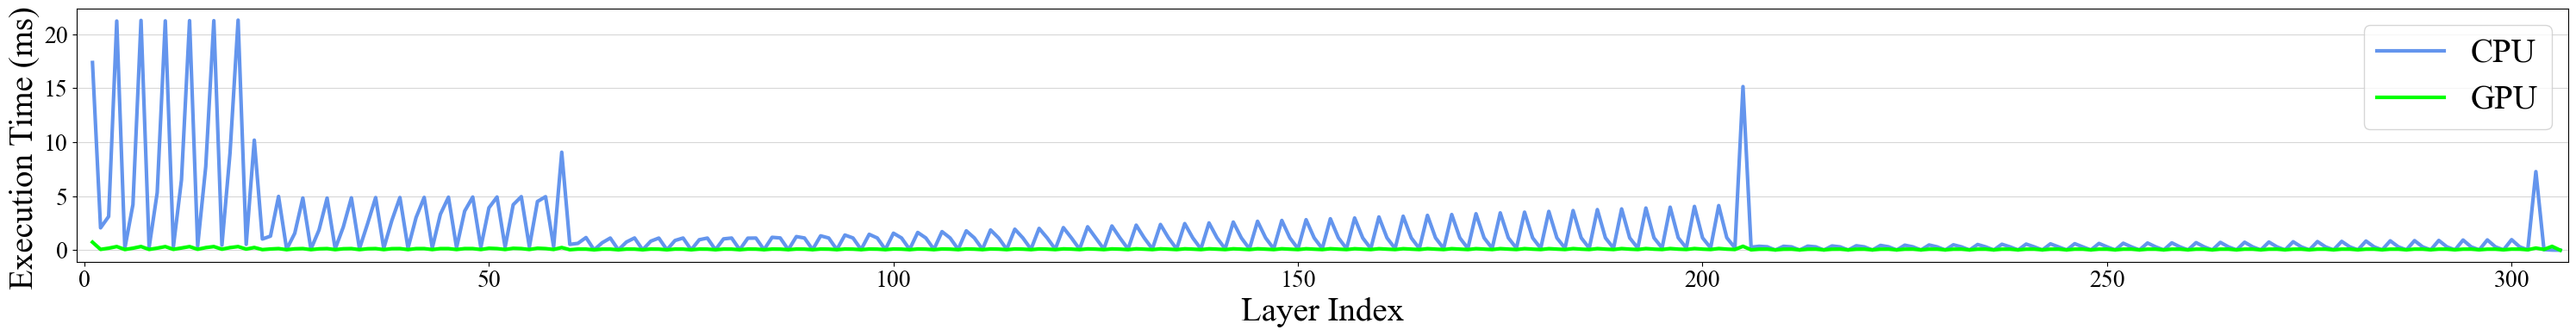

In [57]:
import matplotlib.pyplot as plt
layer_array = list(range(1, len(layer_means) + 1)) 
fig, ax1 = plt.subplots(figsize=(30, 4))
ax1.plot(layer_array, layer_means, label='CPU', color = "cornflowerblue", linewidth=3)
ax1.plot(layer_array, differences, label='GPU', color = "lime", linewidth=3)
plt.xlim(-1, 307)
#plt.xticks(ticks=range(LayerNum(model)), labels=range(1, LayerNum(model) + 1), fontsize=10)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
ax1.set_xlabel('Layer Index', size=28)
ax1.set_ylabel('Execution Time (ms)   ', size=28)
#plt.title('Layer Means and Differences', size=15)
ax1.grid(True, axis='y', alpha = 0.5)
ax1.legend(fontsize=28, ncol=1, frameon=True)

plt.tight_layout()
#plt.show()

output_path = f'./output/1118/delay_per_layer_{model}.eps'
fig.savefig(output_path, format='eps', dpi=300)
output_path = f'./output/1118/delay_per_layer_{model}.png'
fig.savefig(output_path, format='png', dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


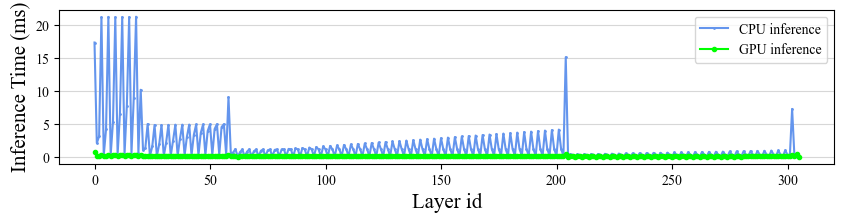

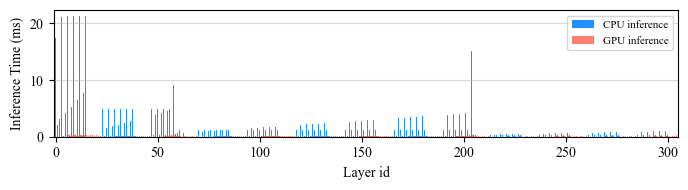

In [58]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 2))
fig2, ax2 = plt.subplots(figsize=(7, 2))
ax1.plot(layer_means, 'o-', markersize=1, label='CPU inference', color = "cornflowerblue")
ax1.plot(differences, 'o-', markersize=3, label='GPU inference', color = "lime")
plt.xlim(0-1,LayerNum(model)-1)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax1.set_xlabel('Layer id', size=15)
ax1.set_ylabel('Inference Time (ms)', size=15)
#plt.title('Layer Means and Differences', size=15)
ax1.grid(True, axis='y', alpha = 0.5)
ax1.legend(fontsize=10, loc="upper right")

bar_width = 0.35
x = np.arange(len(layer_means))

ax2.bar(x - bar_width / 2, layer_means, bar_width, label='CPU inference', color='dodgerblue')
ax2.bar(x + bar_width / 2, differences, bar_width, label='GPU inference', color='salmon')
ax2.set_xlabel('Layer id', size=10)
ax2.set_ylabel('Inference Time (ms)', size=10)
# Adjust the layout and display the plot
ax2.grid(True, axis='y', alpha = 0.5)
ax2.legend(fontsize=8)
plt.tight_layout()

output_path = './output/layer_time_' + model + '.svg'
plt.savefig(output_path)
#plt.show()

output_path = f'./output/1118/delay_per_layer_{model}.eps'
fig.savefig(output_path, format='eps', dpi=300)
output_path = f'./output/1118/delay_per_layer_bar_{model}.eps'
fig2.savefig(output_path, format='eps', dpi=300)

C:\Users\AVEES\AppData\Local\Temp\ipykernel_28824\2970922374.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(range(len(acceleration_ratio)), acceleration_ratio, 'o-', markersize=3, linestyle='-', color="limegreen")


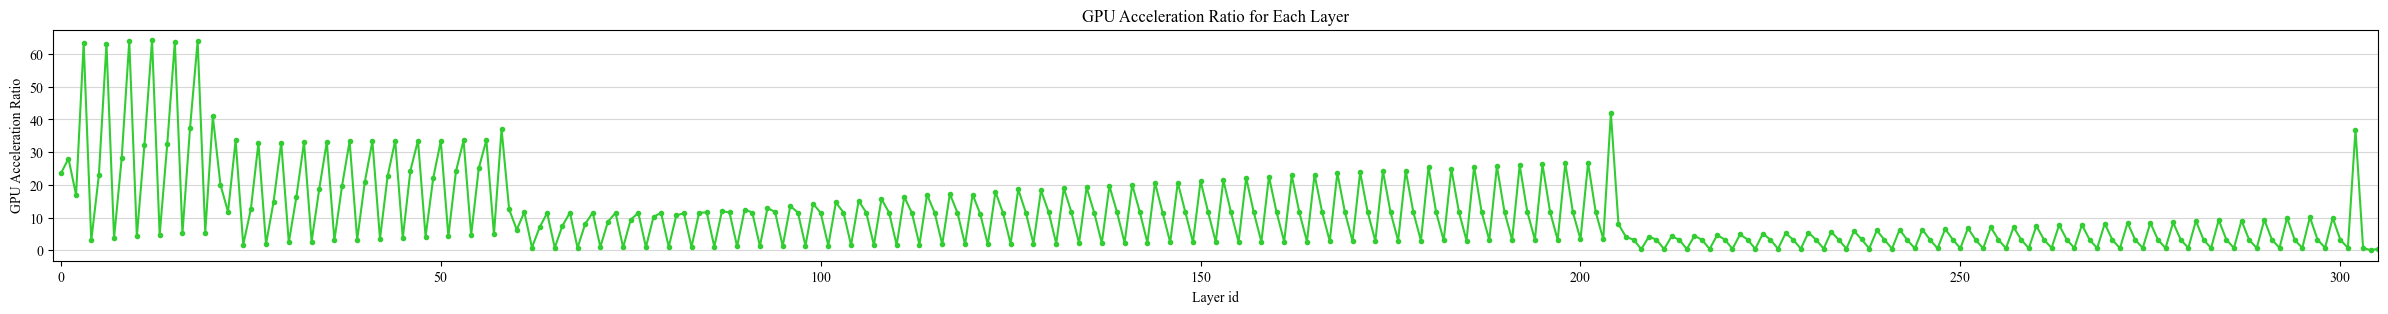

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [46]:
# GPU 가속 비율 계산
acceleration_ratio = [mean_time / gpu_time for mean_time, gpu_time in zip(layer_means, differences)]

# 그래프 그리기
plt.figure(figsize=(30, 3))
plt.plot(range(len(acceleration_ratio)), acceleration_ratio, 'o-', markersize=3, linestyle='-', color="limegreen")
plt.xlim(0-1,LayerNum(model)-1)
plt.xlabel('Layer id')
plt.ylabel('GPU Acceleration Ratio')
plt.title('GPU Acceleration Ratio for Each Layer')
plt.grid(True, axis='y', alpha = 0.5)
plt.show()

output_path = f'./output/1118/delay_per_layer_{model}.eps'
fig.savefig(output_path, format='eps', dpi=300)

In [48]:
# Find the top 10 highest acceleration ratios and their corresponding indices
top_10_indices = sorted(range(len(acceleration_ratio)), key=lambda i: acceleration_ratio[i], reverse=True)[:30]
top_10_ratios = [acceleration_ratio[i] for i in top_10_indices]

# Print the results
print("Top 10 highest acceleration ratios and their corresponding layer indices:")
for idx, ratio in zip(top_10_indices, top_10_ratios):
    print(f"Layer {idx}: {ratio}")

Top 10 highest acceleration ratios and their corresponding layer indices:
Layer 12: 64.19890353401635
Layer 18: 63.98934784786455
Layer 9: 63.904000382354354
Layer 15: 63.74345160691064
Layer 3: 63.33785410899163
Layer 6: 63.08399372801627
Layer 204: 41.97131946308135
Layer 20: 40.929901563626395
Layer 17: 37.426767626712135
Layer 58: 37.036322250539875
Layer 302: 36.80805580558056
Layer 56: 33.678698295129415
Layer 23: 33.61774641543428
Layer 53: 33.60397979950252
Layer 47: 33.539644047979905
Layer 44: 33.506280507647254
Layer 50: 33.39609410345348
Layer 41: 33.31386592807374
Layer 38: 33.30962138953942
Layer 35: 33.10905973320106
Layer 32: 33.00681198910082
Layer 29: 32.84774734839066
Layer 26: 32.750594744717276
Layer 14: 32.44227580558163
Layer 11: 32.2226083674705
Layer 8: 28.069733571051902
Layer 1: 28.040622578145193
Layer 201: 26.705359068916987
Layer 198: 26.59433529865206
Layer 195: 26.235577224884384


Top 10 highest acceleration ratios and their corresponding layer indices:
0 Layer 12: 64.19890353401635
1 Layer 18: 63.98934784786455
2 Layer 9: 63.904000382354354
3 Layer 15: 63.74345160691064
4 Layer 3: 63.33785410899163
5 Layer 6: 63.08399372801627
6 Layer 204: 41.97131946308135
7 Layer 20: 40.929901563626395
8 Layer 17: 37.426767626712135
9 Layer 58: 37.036322250539875
10 Layer 302: 36.80805580558056
11 Layer 56: 33.678698295129415
12 Layer 23: 33.61774641543428
13 Layer 53: 33.60397979950252
14 Layer 47: 33.539644047979905
15 Layer 44: 33.506280507647254
16 Layer 50: 33.39609410345348
17 Layer 41: 33.31386592807374
18 Layer 38: 33.30962138953942
19 Layer 35: 33.10905973320106
20 Layer 32: 33.00681198910082
21 Layer 29: 32.84774734839066
22 Layer 26: 32.750594744717276
23 Layer 14: 32.44227580558163
24 Layer 11: 32.2226083674705
25 Layer 8: 28.069733571051902
26 Layer 1: 28.040622578145193
27 Layer 201: 26.705359068916987
28 Layer 198: 26.59433529865206
29 Layer 195: 26.23557722488

C:\Users\AVEES\AppData\Local\Temp\ipykernel_28824\1432058720.py:19: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(range(len(acceleration_ratio)), acceleration_ratio, 'o-', markersize=3, linestyle='-', color="limegreen")


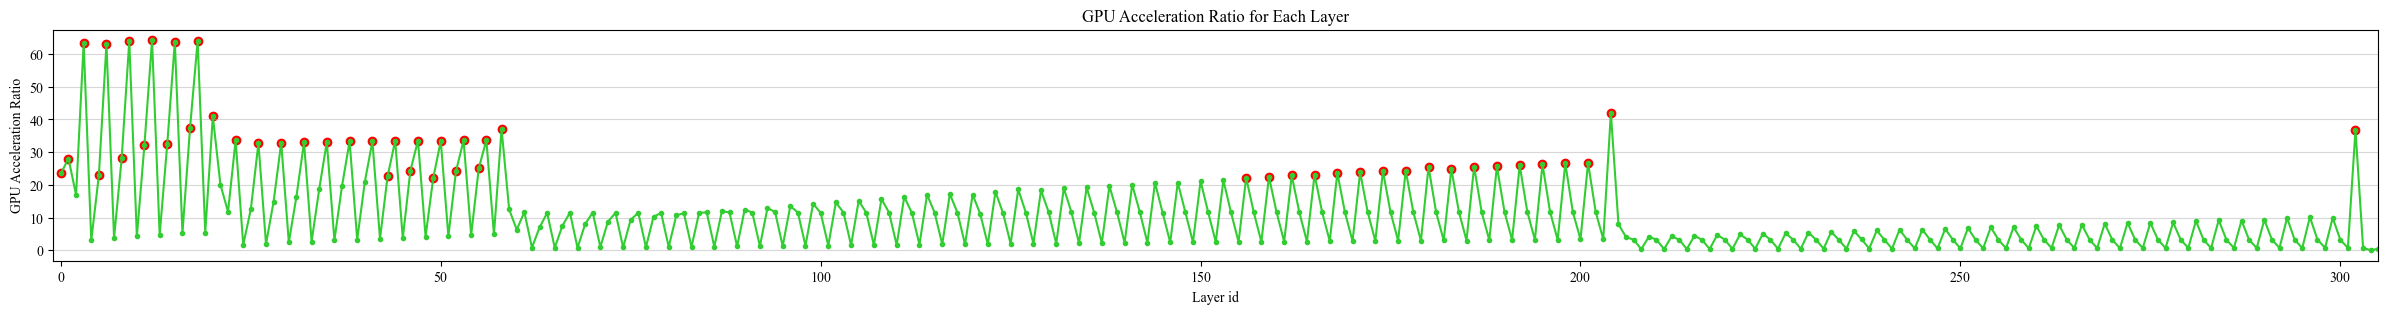

In [49]:
# Find the top 10 highest acceleration ratios and their corresponding indices
top_10_indices = sorted(range(len(acceleration_ratio)), key=lambda i: acceleration_ratio[i], reverse=True)[:50]
top_10_ratios = [acceleration_ratio[i] for i in top_10_indices]

# Print the results
count = 0
layer_idxs = []
print("Top 10 highest acceleration ratios and their corresponding layer indices:")
for idx, ratio in zip(top_10_indices, top_10_ratios):
    print(f"{count} Layer {idx}: {ratio}")
    count += 1
    layer_idxs.append(idx)

layer_idxs.sort()  # 오름차순으로 정렬
print(layer_idxs)
    
# Optional: Plotting the top 10 ratios
plt.figure(figsize=(30, 3))
plt.plot(range(len(acceleration_ratio)), acceleration_ratio, 'o-', markersize=3, linestyle='-', color="limegreen")
plt.scatter(top_10_indices, top_10_ratios, color='red')  # Highlight top 10 points
plt.xlim(-1, len(layer_means)-1)
plt.xlabel('Layer id')
plt.ylabel('GPU Acceleration Ratio')
plt.title('GPU Acceleration Ratio for Each Layer')
plt.grid(True, axis='y', alpha=0.5)
plt.show()


In [50]:
layer_num = LayerNum(model)

folder_path = f"../data/data-{data_type}/sequential-multiblas/" + model + "/"

file_list = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
file_list.sort()
print(file_list)

# --------------------------------------------------------------------------
layer_times = {f"{i:02d}": [] for i in range(1, max_cores + 1)}

# 각 파일을 순회하면서 layer_time_xxblas에 평균 데이터 추가
for file in file_list:
    blas_number = file.split("_")[1].split("blas")[0]  # "01", "02", ..., "11"
    file_path = os.path.join(folder_path, file)
    print(file)
    df = pd.read_csv(file_path)

    for i in range(layer_num):
        column_name = "layer[" + str(i) + "]"
        if column_name in df.columns:
            layer_times[blas_number].append(df[column_name].mean())

#print(layer_times["02"])

# --------------------------------------------------------------------------

# 무지개 색상 순서
rainbow_colors = [
    'red', 'orange', 'yellow', 'green', 'cyan', 'blue', 'purple'
]

# 그래프 그리기
fig, ax = plt.subplots(figsize=(40, 8))

for idx, (key, values) in enumerate(layer_times.items()):
    color = rainbow_colors[idx % len(rainbow_colors)]  # 색상 순서 반복
    ax.plot(values, label=f"blas_{key}", color=color)

# 1. x축의 범위 설정
ax.set_xlim([0-2, layer_num+1])

ax.set_title("Layer Times for Different BLAS Numbers", size=40)
ax.set_xlabel("Layer id", size=40)
ax.set_ylabel("Average Time", size=40)

# 2. 범례를 그래프 박스 바깥에 1행으로 표시
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=len(layer_times), fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.grid(True, axis='y', color=grid_color, linewidth=1, zorder=5)

plt.tight_layout()
plt.show()



FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: '../data/data-1114/sequential-multiblas/densenet201/'

In [51]:
# 각 레이어마다 BLAS 번호가 증가함에 따라 시간이 얼마나 감소하는지 계산
acceleration_by_layer = {f"Layer {i+1}": [] for i in range(layer_num)}

# 모든 레이어에 대해 계산
for i in range(layer_num):
    base_time = layer_times["01"][i]  # 첫 번째 BLAS 번호의 시간을 기준으로 설정
    for key in layer_times:
        if len(layer_times[key]) > i:  # 해당 레이어에 대한 데이터가 존재하는 경우에만 계산
            current_time = layer_times[key][i]
            if base_time > 0:  # 0으로 나누는 것을 방지
                acceleration = (base_time - current_time) / base_time * 100  # 백분율로 계산
                acceleration_by_layer[f"Layer {i+1}"].append(acceleration)
            else:
                acceleration_by_layer[f"Layer {i+1}"].append(0)  # 기준 시간이 0인 경우, 변화 없음을 의미

# BLAS 02의 acceleration 비율이 5% 이상인 레이어 번호 추출
significant_layers = [layer for layer, accs in acceleration_by_layer.items() if accs[1] >= 5]

# BLAS별 평균 가속 계산 및 저장
result_num_blas_acceleration = []
num_blas_versions = len(layer_times.keys())  # BLAS 버전의 수 (예: 11개)

# 각 BLAS 번호에 대한 평균 가속 계산
for blas_idx in range(num_blas_versions):
    sum_acceleration = 0
    count_layers = 0
    # 조건을 만족하는 레이어들에서 각 BLAS 번호의 가속 추출 및 합산
    for layer in significant_layers:
        if len(acceleration_by_layer[layer]) > blas_idx:
            sum_acceleration += acceleration_by_layer[layer][blas_idx]
            count_layers += 1
    # 평균 가속 계산 (해당 BLAS에 대한 데이터가 있는 레이어 수로 나눔)
    if count_layers > 0:
        average_acceleration = sum_acceleration / count_layers
    else:
        average_acceleration = 0  # 해당 BLAS 번호에 대한 데이터가 없는 경우
    result_num_blas_acceleration.append(average_acceleration)

# 결과 출력
print("Average Acceleration for each BLAS Number:")
for idx, avg_acc in enumerate(result_num_blas_acceleration):
    blas_number = "{:02d}".format(idx + 1)
    print(f"BLAS {blas_number}: {avg_acc:.2f}%")

print(result_num_blas_acceleration)

NameError: name 'layer_times' is not defined

In [52]:
#model = "densenet201"

folder_path = f"../data/data-{data_type}/layer_time/" + model + "/"
file_name = 'sequential_inference_list.csv'
file_path = os.path.join(folder_path, file_name)

# CSV 파일에서 데이터를 읽어옴
df = pd.read_csv(file_path)

# e_infer 열의 데이터를 가져옴
e_infer_data = df['e_infer']

# 그래프 그리기
plt.figure(figsize=(6, 4))
plt.plot(result_num_blas_acceleration, 'o-', markersize = 2, zorder=100)
plt.title(f"Inference Delay for Different BLAS numbers with {model}", size = 15)
plt.xlabel("# of CPU cores for Multi-BLAS GEMM", size = 15)
plt.ylabel("Inference Delay (ms)", size = 15)
plt.grid(True, axis='both', color=grid_color, linewidth=1, zorder=5)

# 각 데이터 포인트 옆에 y값을 표시
for idx, value in enumerate(result_num_blas_acceleration):
    plt.text(idx, value + 0.05, f"{value:.2f}", ha='center', va='bottom', fontsize=9)  # Adjust the `0.05` offset if needed.

plt.tight_layout()
plt.show()


NameError: name 'result_num_blas_acceleration' is not defined

<Figure size 600x400 with 0 Axes>

In [ ]:
# 각 레이어마다 BLAS 번호가 증가함에 따라 시간이 얼마나 감소하는지 계산
acceleration_by_layer = {f"Layer {i+1}": [] for i in range(layer_num)}

# 모든 레이어에 대해 계산
for i in range(layer_num):
    base_time = layer_times["01"][i]  # 첫 번째 BLAS 번호의 시간을 기준으로 설정
    for key in layer_times:
        if len(layer_times[key]) > i:  # 해당 레이어에 대한 데이터가 존재하는 경우에만 계산
            current_time = layer_times[key][i]
            if base_time > 0:  # 0으로 나누는 것을 방지
                acceleration = (base_time - current_time) / base_time * 100  # 백분율로 계산
                acceleration_by_layer[f"Layer {i+1}"].append(acceleration)
            else:
                acceleration_by_layer[f"Layer {i+1}"].append(0)  # 기준 시간이 0인 경우, 변화 없음을 의미

# BLAS 02의 acceleration 비율이 5% 이상인 레이어 번호 추출
significant_layers = [layer for layer, accs in acceleration_by_layer.items() if accs[1] >= 5]

# BLAS별 최대, 최소 가속 계산 및 저장
max_num_blas_acceleration = []
min_num_blas_acceleration = []
avg_num_blas_acceleration = []

num_blas_versions = len(layer_times.keys())  # BLAS 버전의 수 (예: 11개)

# 각 BLAS 번호에 대한 최대, 최소 가속 계산
for blas_idx in range(num_blas_versions):
    sum_acceleration = 0
    count_layers = 0
    accelerations = []
    # 조건을 만족하는 레이어들에서 각 BLAS 번호의 가속 추출
    for layer in significant_layers:
        if len(acceleration_by_layer[layer]) > blas_idx:
            accelerations.append(acceleration_by_layer[layer][blas_idx])
            sum_acceleration += acceleration_by_layer[layer][blas_idx]
            count_layers += 1
    if accelerations:
        max_acceleration = max(accelerations)
        min_acceleration = min(accelerations)
        acg_acceleration = sum_acceleration/count_layers
    else:
        max_acceleration = 0
        min_acceleration = 0
        acg_acceleration= 0

    max_num_blas_acceleration.append(max_acceleration)
    min_num_blas_acceleration.append(min_acceleration)
    avg_num_blas_acceleration.append(acg_acceleration)

# 결과 출력
print("Maximum and Minimum Acceleration for each BLAS Number:")
for idx, (max_acc, min_acc) in enumerate(zip(max_num_blas_acceleration, min_num_blas_acceleration)):
    blas_number = "{:02d}".format(idx + 1)
    print(f"BLAS {blas_number}: Max {max_acc:.2f}%, Min {min_acc:.2f}%")
print(avg_num_blas_acceleration)

In [ ]:
#model = "densenet201"

folder_path = "../data/data-0515/layer_time/" + model + "/"
file_name = 'sequential_inference_list.csv'
file_path = os.path.join(folder_path, file_name)

# CSV 파일에서 데이터를 읽어옴
df = pd.read_csv(file_path)

# e_infer 열의 데이터를 가져옴
e_infer_data = df['e_infer']

# 그래프 그리기
plt.figure(figsize=(6, 4))
plt.plot(avg_num_blas_acceleration, 'o-', markersize = 2, zorder=100)
plt.title(f"Inference Delay for Different BLAS numbers with {model}", size = 15)
plt.xlabel("# of CPU cores for Multi-BLAS GEMM", size = 15)
plt.ylabel("Inference Delay (ms)", size = 15)
plt.grid(True, axis='both', color=grid_color, linewidth=1, zorder=5)

# 각 데이터 포인트 옆에 y값을 표시
for idx, value in enumerate(e_infer_data):
    plt.text(idx, value + 0.05, f"{value:.2f}", ha='center', va='bottom', fontsize=9)  # Adjust the `0.05` offset if needed.

plt.tight_layout()
plt.show()


In [ ]:
# Plotting the data as a line graph
plt.figure(figsize=(6, 4))
blas_numbers = list(range(1, 12))
max_values = [0.00, 51.18, 63.38, 73.29, 74.72, 77.56, 80.65, 85.59, 83.67, 85.16, 85.37]
decreased_values = [100 - value for value in max_values]

plt.plot(blas_numbers, decreased_values, marker='o', linestyle='-', color='darkblue')

# Adding text labels for each point
for i, txt in enumerate(decreased_values):
    plt.annotate(f'{txt:.2f}%', (blas_numbers[i], decreased_values[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('BLAS Number')
plt.ylabel('Decreased Percentage from 100%', size = 15)
plt.title('Decrease from 100% for Acceleration ratio per BLAS Number', size = 15)
plt.xticks(blas_numbers)
plt.grid(True, axis='both', color=grid_color, linewidth=1, zorder=5)
plt.show()


In [ ]:
# Adjusting the values to be negative from 0%
negative_values = [-value for value in max_values]

# Plotting the data as a line graph
plt.figure(figsize=(6, 4))
plt.plot(blas_numbers, negative_values, marker='o', linestyle='-', color='tab:blue')

# Adding text labels for each point
for i, txt in enumerate(negative_values):
    plt.annotate(f'{txt:.2f}%', (blas_numbers[i], negative_values[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('BLAS Number', size = 15)
plt.ylabel('Decreased Percentage', size = 15)
plt.title('Decrease from 0% for Acceleration ratio per BLAS Number', size = 15)
plt.xticks(blas_numbers)
plt.grid(True, axis='both', color=grid_color, linewidth=1, zorder=5)
plt.show()